## Topic modelling:
https://stackabuse.com/python-for-nlp-topic-modeling/?fbclid=IwAR3zBQ64_wlRobctSJWZ_CVyUWwfEpFPgI7JCLq7Mt1xbXZjEMVFDmW1uh4
https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

Látens direklet allokáció

- Korpusz szövegeiben fellelhető rejtett struktúra felderítése a cél.
- A témateret reprezentálja: {Topic_i: Weight(Topic_i, T) for Topic_i in Topics}
- Felügyeletlen gépi tanuás: kimentként topikokat/klasztereket kapunk, a szavak alapján.
- Generalizált valószínűségi modell.
- A szövegben lévő szavak alapján csoportosít. Azon dokumentumok, melyekben hasonló szavak vannak, egy témába tartoznak.

In [1]:
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer # creating document term matrix
import pandas as pd
import numpy as np

In [97]:
df = pd.read_pickle('index_sport_pol_senti_2.pkl')

In [98]:
len(df)

4209

In [99]:
nemkell = ['Putyin']
df = df[~df['cim'].str.contains('|'.join(nemkell))]
len(df)

4209

In [100]:
for i in df['merged_lemmas']:
    a = i
    try:
        i = a.remove('es')
    except:
        i = a

In [101]:
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [102]:
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(df['merged_lemmas'].astype(str))

In [103]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(count_data)

In [104]:
count_data
# A 8518 cikk 155786 dimenziós vektorként írható le, ami azt jelenti, hogy a 
# cikkekből előállított szótár 155786 szóból áll.

<4209x117458 sparse matrix of type '<class 'numpy.int64'>'
	with 1213499 stored elements in Compressed Sparse Row format>

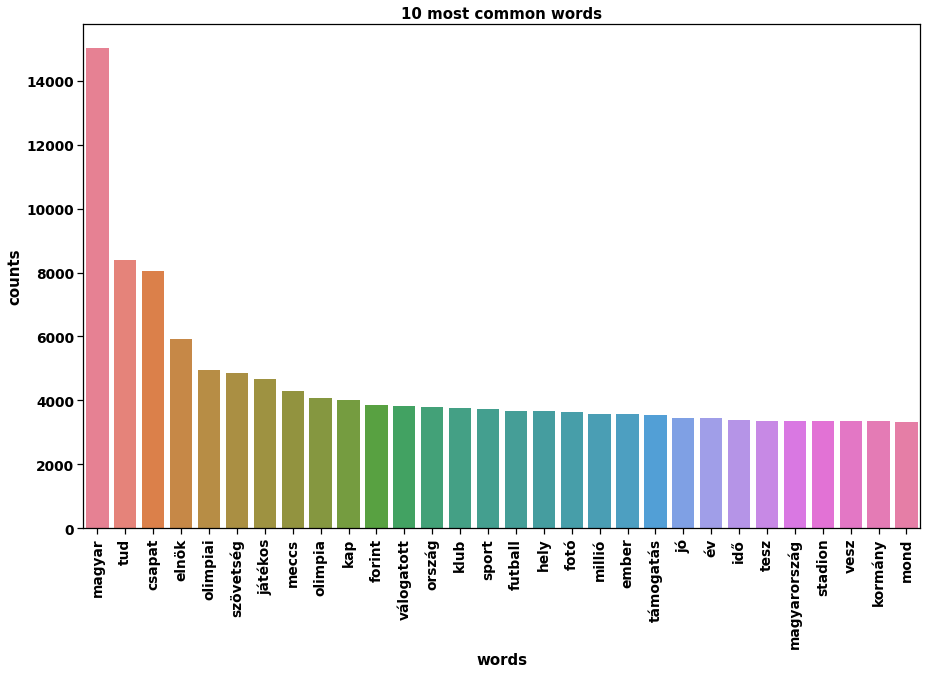

In [105]:
plot_10_most_common_words(count_data, count_vectorizer)

In [106]:
def common_words(count_data, count_vectorizer,db):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:db]
    b=[]
    b.append([i[0] for i in count_dict])
    b=b[0]
    return(b)

In [107]:
common_words(count_data, count_vectorizer,20)

['magyar',
 'tud',
 'csapat',
 'elnök',
 'olimpiai',
 'szövetség',
 'játékos',
 'meccs',
 'olimpia',
 'kap',
 'forint',
 'válogatott',
 'ország',
 'klub',
 'sport',
 'futball',
 'hely',
 'fotó',
 'millió',
 'ember']

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [90]:
lda = LDA()
search_params = {'n_components': [3, 4, 5, 6], 'learning_decay': [.7]}

In [91]:
model = GridSearchCV(lda, param_grid=search_params)

In [92]:
model.fit(count_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_components': [3, 4, 5, 6], 'learning_decay': [0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [93]:
best_lda_model = model.best_estimator_

In [94]:
best_lda_model

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=3, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [60]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [108]:
number_topics = 3
number_words = 80

In [109]:
lda = LDA(n_components=number_topics, n_jobs=-1, random_state=30)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
magyar tud ember fotó orbán mond kormány fidesz ország idő akar magyarország tesz rész ami tart lát fog vesz év kérdés nap megy politikai százalék szeret szó index ad beszél jön fontos gyerek képviselő törvény élet aki kap dolog ügy vezető hely mszp helyzet választás viktor él elnök jános jó világ dolgozik ír jelent kis jár gondol munka kezd istván áll miniszterelnök biztos pár név marad politikus kerül cég néz foci európai fiatal maga orosz kapcsolat párt nő egyébként út

Topic #1:
csapat meccs játékos válogatott fifa gól tud futball vb játszik jó ország bajnokság német elnök világbajnokság magyar nyer klub hely mérkőzés szövetség edző európa orosz uefa kap pálya döntő eb pont angol olasz perc labda spanyol blatter játék jut es kapitány győzelem európai selejtező csoport világ stadion nemzetközi megy kupa vesz szezon torna millió nagy labdarúgó akar idő fog francia év nap amerikai ad ellenfél bajnok jön szurkoló brazil bajnoki biztos tesz vezető ami dé

In [110]:
topic_values = lda.transform(count_data)

In [111]:
topic_values

array([[3.97277825e-02, 1.92067016e-03, 9.58351547e-01],
       [2.40639806e-01, 1.45646679e-03, 7.57903728e-01],
       [8.51505637e-01, 9.87997057e-04, 1.47506366e-01],
       ...,
       [1.21229363e-01, 2.55120088e-02, 8.53258628e-01],
       [7.47845589e-01, 8.05667731e-04, 2.51348743e-01],
       [3.56519308e-03, 1.80723201e-01, 8.15711606e-01]])

In [112]:
df['topic'] = topic_values.argmax(axis=1)

In [83]:
df.to_pickle('index_sport_pol_senti_2.pkl')

In [113]:
len(df)

4209

In [114]:
df.columns
df.dtypes

cim                       object
datum                     object
szerzo                    object
tag                       object
head                      object
szoveg                    object
merged                    object
nyelv                     object
nap                      float64
cim_cleaned               object
szoveg_cleaned            object
merged_tokens             object
merged_lemmas             object
sport                      int64
merged_ners               object
politika                   int64
id                         int32
senti                     object
senti_pol                float64
month             datetime64[ns]
topic                      int64
dtype: object

In [115]:
mcount = pd.read_pickle('monthsum.pkl')
mcount = mcount[['month', 'num_per_ho']]
mcount = mcount.groupby(['month']).sum().reset_index()
mcount

,month,num_per_ho
0,1999-06-01,1
1,1999-07-01,7
2,1999-08-01,2
3,1999-09-01,13
4,1999-10-01,21
5,1999-11-01,12
6,1999-12-01,8
7,2000-01-01,64
8,2000-02-01,98
9,2000-03-01,276


In [116]:
mcount=mcount[mcount["month"] > '2001-01-01']

In [117]:
#https://stackoverflow.com/questions/43832311/how-to-plot-by-category-over-time/43835199?fbclid=IwAR1XxAq0XfM_6UomdNqBaDjfxl_Rc1Wt37mee0EbjPdTwh4yLZaik578Ju8
ctdf = (df[['month','topic']].reset_index()
          .groupby(['month','topic'], as_index=False)
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'ct'})
       )
ctdf

,month,topic,ct
0,2000-03-01,2,1
1,2000-04-01,1,1
2,2000-04-01,2,1
3,2000-05-01,0,1
4,2000-06-01,0,1
5,2000-06-01,2,1
6,2000-07-01,0,2
7,2000-07-01,1,1
8,2000-08-01,0,4
9,2000-08-01,1,1


In [118]:
ctdf=ctdf[ctdf["month"] > '2001-01-01']

In [119]:
ct = pd.merge(ctdf, mcount[['month', 'num_per_ho']], on='month',how="left")

In [120]:
ct

,month,topic,ct,num_per_ho
0,2001-02-01,0,4,1594
1,2001-02-01,1,1,1594
2,2001-02-01,2,1,1594
3,2001-03-01,0,1,1835
4,2001-03-01,1,1,1835
5,2001-03-01,2,4,1835
6,2001-04-01,0,2,1823
7,2001-04-01,1,1,1823
8,2001-04-01,2,1,1823
9,2001-05-01,2,2,2085


In [121]:
ct['arany'] = ct['ct'] / ct['num_per_ho']
ct

,month,topic,ct,num_per_ho,arany
0,2001-02-01,0,4,1594,0.002509
1,2001-02-01,1,1,1594,0.000627
2,2001-02-01,2,1,1594,0.000627
3,2001-03-01,0,1,1835,0.000545
4,2001-03-01,1,1,1835,0.000545
5,2001-03-01,2,4,1835,0.002180
6,2001-04-01,0,2,1823,0.001097
7,2001-04-01,1,1,1823,0.000549
8,2001-04-01,2,1,1823,0.000549
9,2001-05-01,2,2,2085,0.000959


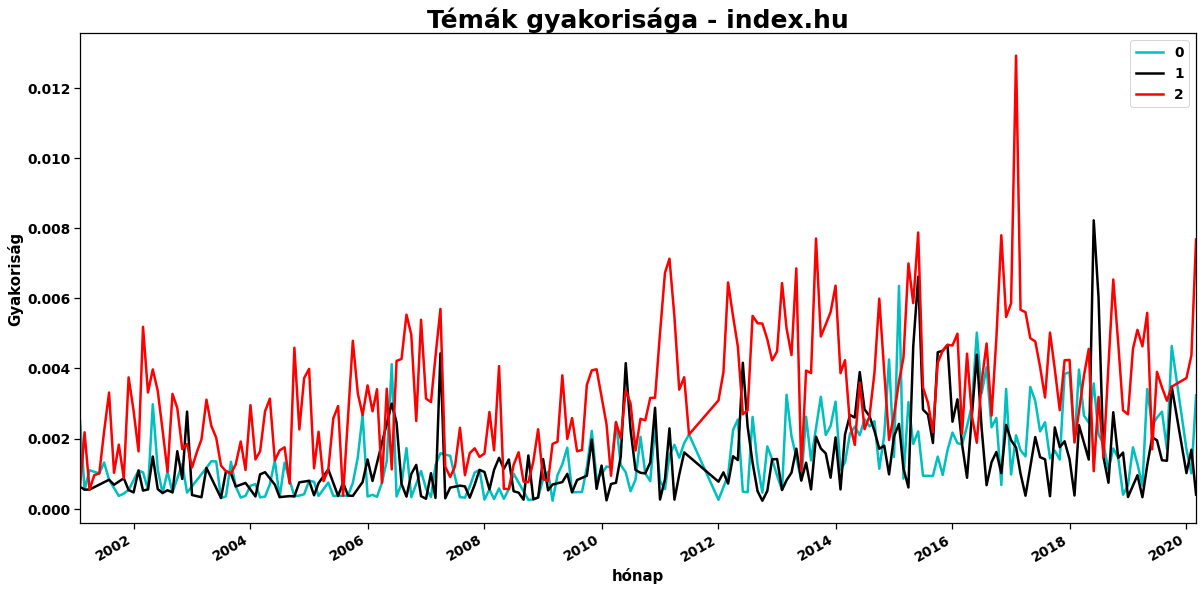

In [122]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
colors=["c", "black", "red"]

fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in ct.groupby('topic'):
    data.plot(x='month', y='arany', ax=ax, label=key, color=colors[key])
    plt.title('Témák gyakorisága - index.hu', fontsize=25)
    plt.xlabel('hónap')
    plt.ylabel('Gyakoriság')

In [123]:
tcount = mcount[['month', 'topic']].groupby(['month']).sum()

KeyError: "['topic'] not in index"

KeyError: 'category'

<Figure size 1080x667.491 with 0 Axes>

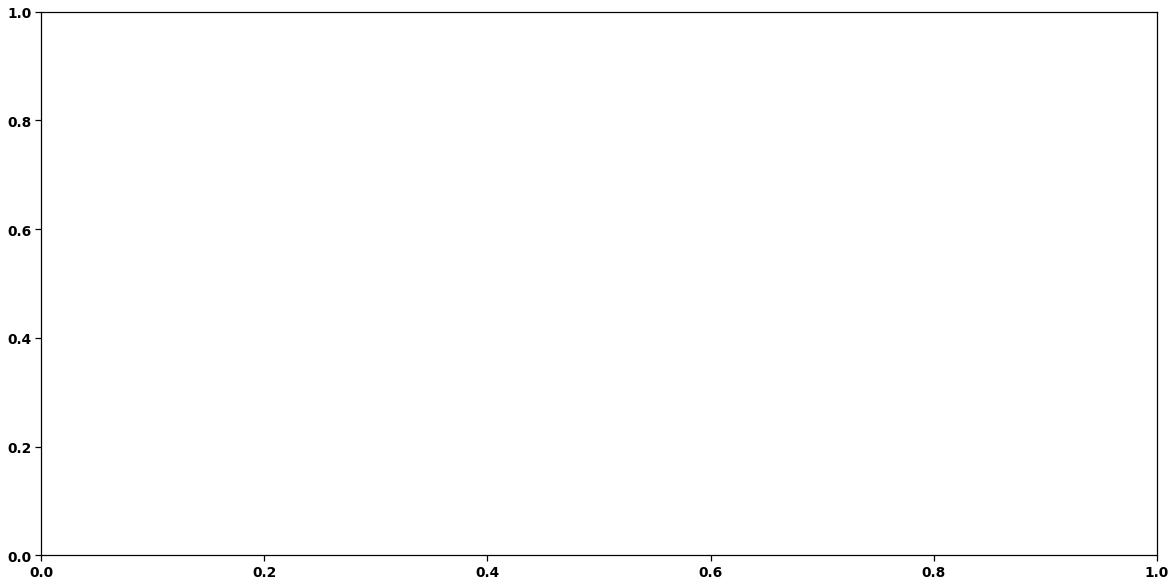

In [124]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.figure(2, figsize=(15, 15/1.6180))
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
colors={"sporteredmények":"black", "magyar sport nemzetközi helyzete":"red", "finanszírozás": "c"}
fig, ax = plt.subplots()
# key gives the group name (i.e. category), data gives the actual values
for key, data in ct.groupby('category'):
    data.plot(x='month', y='arany', ax=ax, label=key, color=colors[key])
    plt.title('Témák gyakorisága - index.hu', fontsize=30,fontweight='bold' )
    plt.xlabel('hónap')
    plt.ylabel('Gyakoriság')

In [78]:
category=[]
for i in ct["topic"]:
    if i==0:
        category.append("magyar sport nemzetközi helyzete")
    elif i==1:
        category.append("finanszírozás")
    elif i==2:
        category.append("sporteredmények")

ct["category"]=category
ct

,month,topic,ct,num_per_ho,arany,category
0,2001-02-01,0,1,1594,0.000627,magyar sport nemzetközi helyzete
1,2001-02-01,1,3,1594,0.001882,finanszírozás
2,2001-02-01,2,2,1594,0.001255,sporteredmények
3,2001-03-01,0,1,1835,0.000545,magyar sport nemzetközi helyzete
4,2001-03-01,1,4,1835,0.002180,finanszírozás
5,2001-03-01,2,1,1835,0.000545,sporteredmények
6,2001-04-01,1,2,1823,0.001097,finanszírozás
7,2001-04-01,2,2,1823,0.001097,sporteredmények
8,2001-05-01,1,2,2085,0.000959,finanszírozás
9,2001-06-01,1,3,1981,0.001514,finanszírozás


In [82]:
pd.set_option('display.max_rows', 16000)
df[(df['topic'] == 1) & ((df['month'] > '2011-01-01') & (df['month'] < '2014-01-01'))].sort_values(by=['month'])

,cim,datum,szerzo,tag,head,szoveg,merged,nyelv,nap,cim_cleaned,...,merged_tokens,merged_lemmas,sport,merged_ners,politika,id,senti,senti_pol,month,topic
"""21390""",EU-sporttanácskozás Budapesten és Gödöllőn,2011.02.21. 14:52,MTI,"Sport,sport,eu,tanácskozás",NA,Hétfőn és kedden Budapesten a különböző nemzet...,Hétfőn és kedden Budapesten a különböző nemzet...,NaN,NaN,eu sporttanácskozás budapesten gödöllőn,...,"[hétfőn, kedden, budapesten, nemzeti, nemzetkö...","[hétfő, kedd, budapest, nemzeti, nemzetközi, s...",1,NaN,1,1586,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000000,2011-02-01,1
"""18793""",Egynapos konferencia a magyar labdarúgásról,2011.02.03. 13:24,MTI,"Sport,Futball,hírek,futball,mlsz,fórum",NA,Megalakulásának 110. évfordulója alkalmából A ...,Megalakulásának 110. évfordulója alkalmából A ...,NaN,NaN,egynapos konferencia magyar labdarúgásról,...,"[megalakulásának, évfordulója, alkalmából, mag...","[megalakulás, évforduló, alkalom, magyar, labd...",1,NaN,1,1571,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.029851,2011-02-01,1
"""19604""",A sport civil szervezeteit tájékoztatta Czene ...,2011.02.09. 14:02,MTI,"Sport,sport,czene,attila,sportpolitika",NA,Czene Attila sportért felelős államtitkár szer...,Czene Attila sportért felelős államtitkár szer...,NaN,NaN,sport civil szervezeteit tájékoztatta czene at...,...,"[czene, attila, sportért, felelős, államtitkár...","[czene, attila, sport, felelős, államtitkár, s...",1,NaN,1,1578,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.015152,2011-02-01,1
"""19765""",Felfüggesztett adószámú cégé a Vasas,2011.02.10. 13:19,MTI,"Sport,Futball,vasas,szeviép,nav",NA,A Nemzeti Adó- és Vámhivatal (NAV) októberben ...,A Nemzeti Adó- és Vámhivatal (V) októberben fe...,NaN,NaN,felfüggesztett adószámú cégé vasas,...,"[nemzeti, adó, vámhivatal, v, októberben, felf...","[nemzeti, adó, vámhivatal, v, október, felfügg...",1,NaN,1,1580,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-0.003049,2011-02-01,1
"""20718""",Balogh Gábor a sportiskolai és akadémiai rends...,2011.02.17. 10:20,MTI,"Sport,sportpolitika,sportiskolák,akadémiák",NA,"Balogh Gábor, a miniszterelnök sportügyekért f...","Balogh Gábor, a miniszterelnök sportügyekért f...",NaN,NaN,balogh gábor sportiskolai akadémiai rendszer,...,"[balogh, gábor, miniszterelnök, sportügyekért,...","[balogh, gábor, miniszterelnök, sportügy, fele...",1,NaN,1,1582,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.011765,2011-02-01,1
"""20779""","McCabe végelszámolást javasolt, nem ad több pé...",2011.02.17. 13:41,MTI,"Sport,Futball,kevin,mccabe,ftc,ferencváros",NA,A Ferencvárosi Torna Club visszavásárolná a la...,A Ferencvárosi Torna Club visszavásárolná a la...,NaN,NaN,mccabe végelszámolást javasolt ad pénzt ingyen...,...,"[ferencvárosi, torna, club, visszavásárolná, l...","[ferencvárosi, torna, club, visszavásárol, lab...",1,NaN,1,1583,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-0.023256,2011-02-01,1
"""21036""",Balogh Gábor: a sportnak a politika középpontj...,2011.02.18. 19:04,MTI,"Sport,balogh,gábor,sporttanácsadó,sportfejlesz...",NA,"Balogh Gábor, a miniszterelnök sporttanácsadój...","Balogh Gábor, a miniszterelnök sporttanácsadój...",NaN,NaN,balogh gábor sportnak politika középpontjába k...,...,"[balogh, gábor, miniszterelnök, sporttanácsadó...","[balogh, gábor, miniszterelnök, sporttanácsadó...",1,NaN,1,1585,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.023438,2011-02-01,1
"""21504""",Finomítják az olimpiai érmesek járadékának iga...,2011.02.22. 11:33,NA,"Sport,kovács,antal,hegedüs,csaba,csősz,imre,él...","\Nem érte el azt a célt a törvény, amiért szül...",2009 végén emelkedett jogerőre az a törvénymó...,"\Nem érte el azt a célt a törvény, amiért szül...",NaN,NaN,finomítják olimpiai érmesek járadékának igazsá...,...,"[célt, törvény, amiért, született, kovács, ant...","[cél, törvény, ami, születik, kovács, antal, c...",1,NaN,1,1588,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-0.045045,201

## Top 10 szó topikonként

In [87]:
top1 = df[df['topic'] == 0]
top2 = df[df['topic'] == 1]
top3 = df[df['topic'] == 2]

In [88]:
print(len(top1))
print(len(top2))
print(len(top3))

750
2392
1067


In [89]:
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(top1['merged_lemmas'].astype(str))

In [37]:
common_words(count_data, count_vectorizer, 15)

['magyar',
 'elnök',
 'tud',
 'szövetség',
 'forint',
 'olimpiai',
 'sport',
 'kormány',
 'támogatás',
 'orbán',
 'millió',
 'ember',
 'milliárd',
 'bizottság',
 'kap']

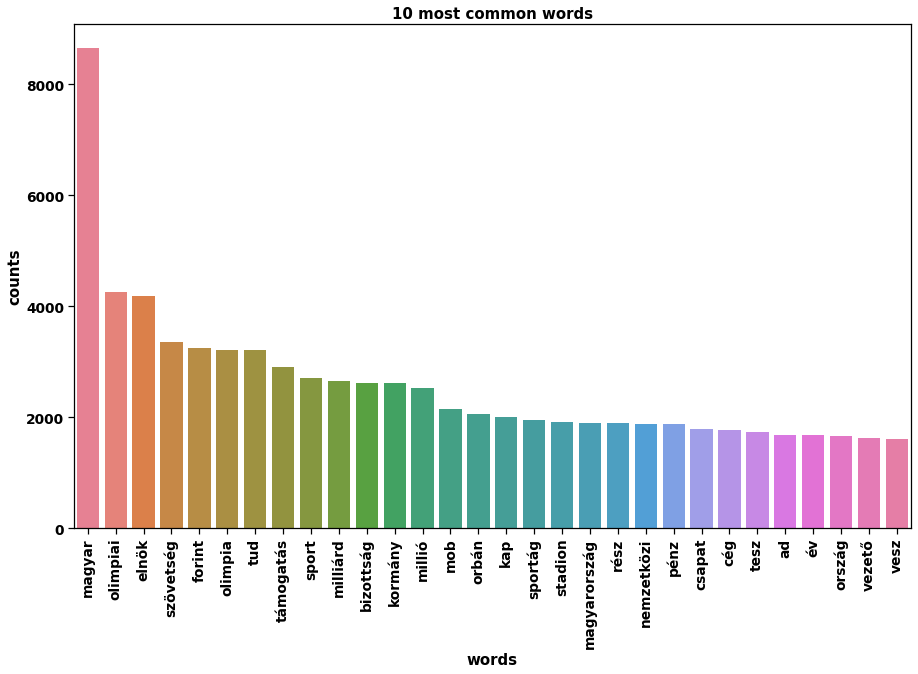

In [218]:
plot_10_most_common_words(count_data, count_vectorizer)

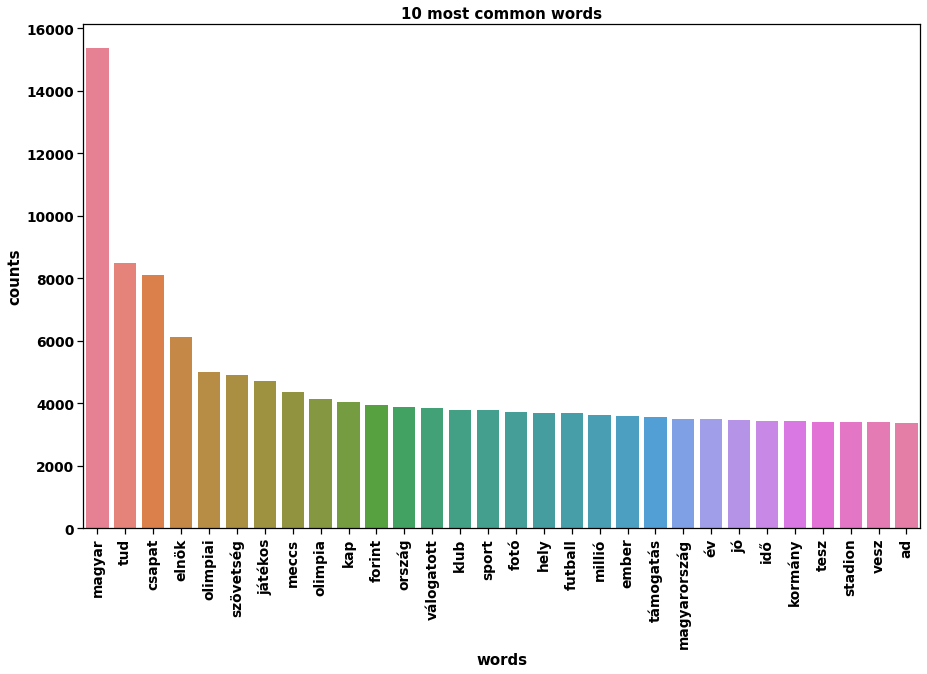

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(count_data)

plot_10_most_common_words(count_data, count_vectorizer)

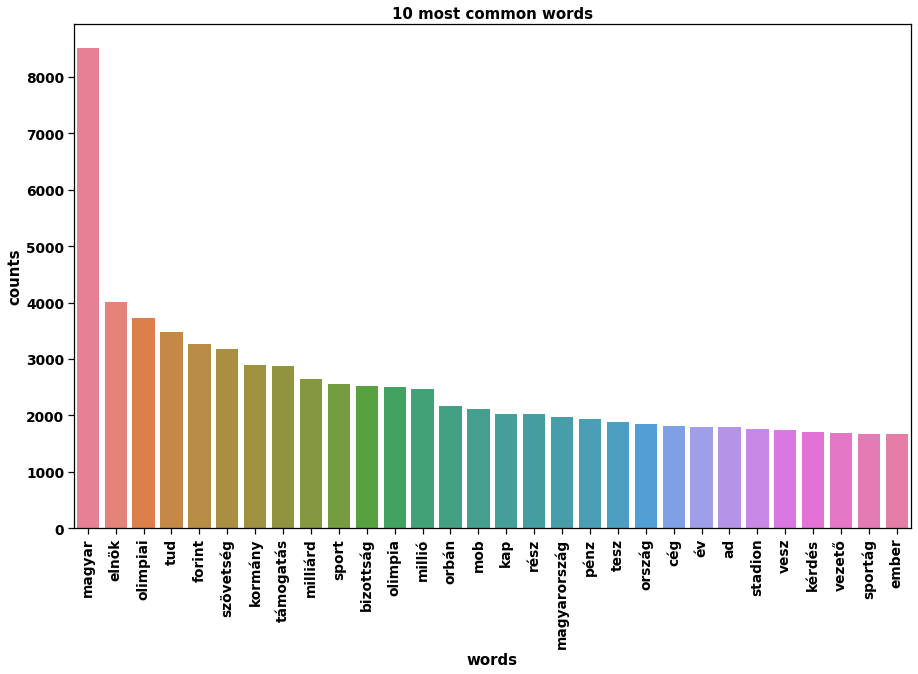

In [90]:
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(top2['merged_lemmas'].astype(str))

plot_10_most_common_words(count_data, count_vectorizer)

In [91]:
common_words(count_data, count_vectorizer, 16)

['magyar',
 'elnök',
 'olimpiai',
 'tud',
 'forint',
 'szövetség',
 'kormány',
 'támogatás',
 'milliárd',
 'sport',
 'bizottság',
 'olimpia',
 'millió',
 'orbán',
 'mob',
 'kap']

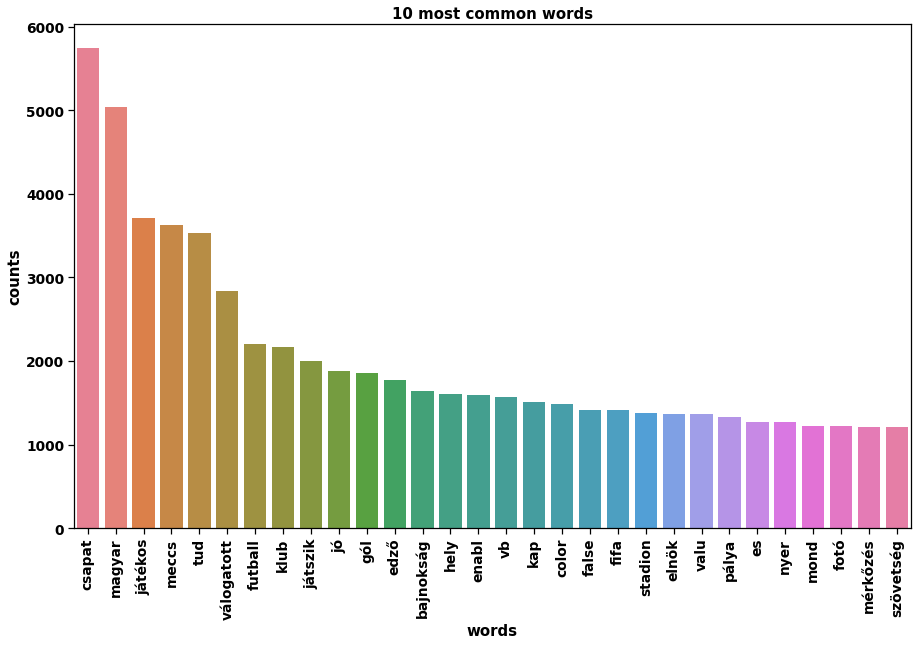

In [41]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(count_data)

plot_10_most_common_words(count_data, count_vectorizer)

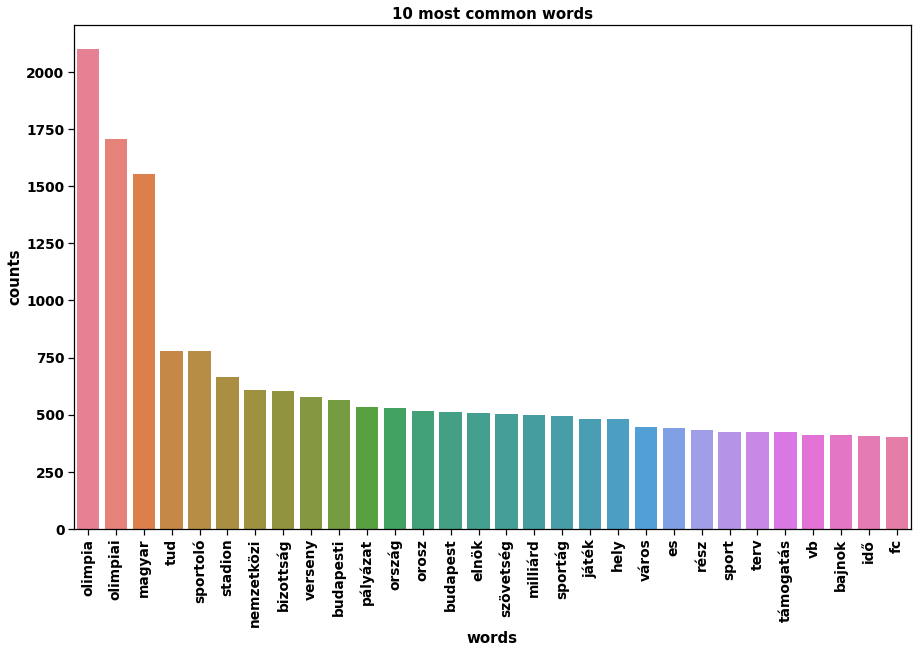

In [42]:
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(top3['merged_lemmas'].astype(str))

plot_10_most_common_words(count_data, count_vectorizer)

In [52]:
common_words(count_data, count_vectorizer, 15)

['olimpia',
 'olimpiai',
 'magyar',
 'tud',
 'sportoló',
 'stadion',
 'nemzetközi',
 'bizottság',
 'verseny',
 'budapesti',
 'pályázat',
 'ország',
 'orosz',
 'budapest',
 'elnök']

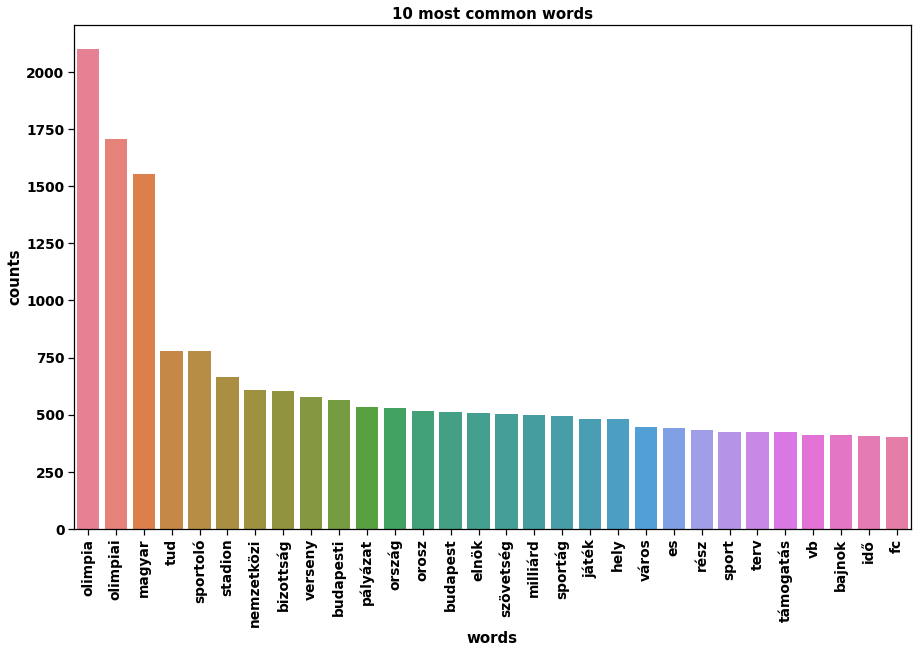

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf_matrix = transformer.fit_transform(count_data)

plot_10_most_common_words(count_data, count_vectorizer)